In [1]:
from model import *
from A2C_agent import *
from pokemon_env import *

from itertools import count

import torch
import numpy as np
import matplotlib.pyplot as plt

Load the Pokemon embeddings.

In [2]:
df = pd.read_csv('Data/pokemon_small_embeddings.csv')

In [3]:
df.head()

,Pokemon,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,...,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31
0,Bulbasaur,0.176876,0.024490,-0.506288,-1.252504,-1.479394,1.013380,1.186356,-1.309221,1.224058,...,-1.324177,0.834712,0.291582,-1.020162,-0.139150,2.126306,0.675927,1.204275,-0.110007,0.995182
1,Horsea,0.501605,-0.052334,-0.721622,-0.284430,0.922716,-1.268923,-1.893838,1.799177,0.071109,...,-1.853872,-1.109036,-0.516887,0.947678,0.320083,-0.539939,-1.217310,1.309489,-0.147258,-0.549346
2,Diglett,1.861715,0.625864,-0.376933,-0.962984,0.403147,0.963874,-1.215075,0.217034,-1.531598,...,-0.855032,-1.204082,2.021872,-1.172745,1.038530,0.759718,0.589223,0.217444,0.830931,-0.650673
3,Machop,-1.734448,0.911212,-0.010313,-1.150018,1.822839,-0.357089,0.690320,1.004881,-1.336256,...,1.821585,-0.924511,-0.581103,0.388137,0.542195,0.449241,-0.308982,-0.519000,0.895490,0.852862
4,Jynx,0.169774,-0.317828,2.083888,-0.104059,-0.441825,0.482504,-1.483912,0.656665,1.013320,...,0.250018,-0.571366,-1.275405,0.946374,0.116125,-1.345630,0.936227,1.057473,0.486862,-1.238626


Create the environment, and get the intial state s0 using a pool containing Charmander, and Bulbasaur.

In [4]:
env = PokemonEnv(num_battles=10, deterministic=False)
pool = ['Charmander','Bulbasaur']
env.build_pool(pool)
state = env.reset()
print(state)

[0.5, -0.5]


Simulate a battle using this pool.

In [5]:
env.battle(render=True)

Round 0
Charmander vs. Bulbasaur
Bulbasaur used tackle
It did normal damage...
Charmander used ember
Its super effective!...
Bulbasaur used tackle
It did normal damage...
Charmander used ember
Its super effective!...
Charmander won!

Round 1
Charmander vs. Bulbasaur
Charmander used ember
Its super effective!...
Bulbasaur used tackle
It did normal damage...
Charmander used ember
Its super effective!...
Charmander won!

Round 2
Charmander vs. Bulbasaur
Charmander used ember
Its super effective!...
Bulbasaur used tackle
It did normal damage...
Charmander used ember
Its super effective!...
Charmander won!

Round 3
Charmander vs. Bulbasaur
Charmander used ember
Its super effective!...
Bulbasaur used tackle
It did normal damage...
Charmander used ember
Its super effective!...
Charmander won!

Round 4
Charmander vs. Bulbasaur
Bulbasaur used tackle
It did normal damage...
Charmander used ember
Its super effective!...
Bulbasaur used tackle
It did normal damage...
Charmander used ember
Its super

(-1.0, [0.5, -0.5])

Define our Actor and Critic models as well as our A2C agent.

In [6]:
embedding_size = 32

num_pokemon = len(env.pool)
num_types = len(env.types)
num_moves = len(env.moves)

actor_model = Actor(num_pokemon*embedding_size,[128,64,32],[num_types-1,num_types,num_moves-1,num_moves])
critic_model = Critic(num_pokemon*embedding_size,[128,64,32],[num_types-1,num_types,num_moves-1,num_moves])
agent = ActorCritic_OneStep(env, df, actor_model, critic_model, .001, .001, .99)

Create a predetermined pool and begin training.

In [7]:
pools = [['Charmander','Bulbasaur'],['Bulbasaur','Charmander'],
        ['Squirtle','Pikachu'],['Pikachu','Squirtle'],
        ['Pidgey','Lapras'],['Lapras','Pidgey'],
        ['Ekans','Diglett'],['Diglett','Ekans']]

rewards, avg_rewards = agent.learn_task(pools, n_episodes = 500)

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [55:28<00:00,  6.66s/it]


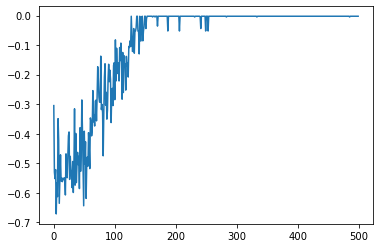

In [8]:
plt.plot(rewards)

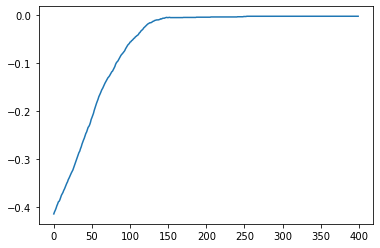

In [9]:
plt.plot(avg_rewards)

Print the agent-generated Pokemon for each matchup:

In [10]:
reward, arrelle = agent.generate_arrelle(['Bulbasaur','Charmander'])

print(reward)
print(arrelle.types)
print(arrelle.moves[0].name)
print(arrelle.moves[1].name)
print(arrelle.moves[2].name)
print(arrelle.moves[3].name)

0.0
['fairy', 'ground']
mud slap
water gun
tackle
poison sting


In [11]:
reward, arrelle = agent.generate_arrelle(['Squirtle','Pikachu'])

print(reward)
print(arrelle.types)
print(arrelle.moves[0].name)
print(arrelle.moves[1].name)
print(arrelle.moves[2].name)
print(arrelle.moves[3].name)

0.0
['fairy', 'ground']
mud slap
water gun
tackle
poison sting


In [12]:
reward, arrelle = agent.generate_arrelle(['Pidgey','Lapras'])

print(reward)
print(arrelle.types)
print(arrelle.moves[0].name)
print(arrelle.moves[1].name)
print(arrelle.moves[2].name)
print(arrelle.moves[3].name)

0.0
['fairy', 'bug']
low kick
water gun
tackle
poison sting


In [13]:
reward, arrelle = agent.generate_arrelle(['Ekans','Diglett'])

print(reward)
print(arrelle.types)
print(arrelle.moves[0].name)
print(arrelle.moves[1].name)
print(arrelle.moves[2].name)
print(arrelle.moves[3].name)

0.0
['fairy', 'bug']
low kick
water gun
tackle
poison sting
